## $\phi_4$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi_k(x, v):
    return np.tanh(x/(np.sqrt(2) * np.sqrt(1-v**2)))

def phi_k_t(x, v):

    def sech(x):
        return 1/np.cosh(x)

    return sech(x/(np.sqrt(2) * np.sqrt(1-v**2)))**2

def phi_0(x, x0, v):
    return phi_k(x+x0, v) - phi_k(x-x0, v)-1

def phi_1(x, x0, v):
    return -v/np.sqrt(2*(1-v**2)) * (phi_k_t(x+x0, v) + phi_k_t(x-x0, v))

In [33]:
x0 = 10
xi = -20
xf = 20
h = 0.2
dt = h/4
tf = 100
Nx = int((xf - xi)/h)
Nt = int(tf/dt)

# Velocidad
v = 0.35

x = np.arange(xi,xf, h)
t = np.arange(0, tf, dt)

phi = np.zeros((Nt, Nx))

# Setea condiciones iniciales
phi[0] = phi_0(x, x0, v)
phi[1] = phi_1(x, x0, v) * dt + phi[0]

In [34]:
# Condiciones de borde periódicas

l = dt/h

for n in range(2, Nt):
    # Instante anterior y paso actual
    phi_j_last = phi[n-2]
    phi_j = phi[n-1]
    
    # Vecino derecha
    phi_j_der = np.roll(phi_j, shift=1)
    
    # Vecino izquierda
    phi_j_izq = np.roll(phi_j, shift=-1)
    
    # Solución instante actual
    phi_j_sgte =  2 * (1 - l**2) * phi_j - phi_j_last + l**2 * (phi_j_der + phi_j_izq) + dt**2 * (phi_j - phi_j**3)
    
    # Guarda solución
    phi[n] = phi_j_sgte

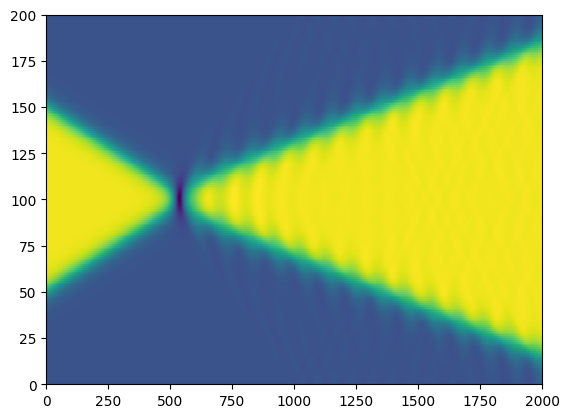

In [35]:
plt.pcolormesh(phi.T)

In [23]:
dif = np.diff(phi[0])
tol = 1e-4
np.where(dif>tol)

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
        71, 72, 73, 74, 75, 76, 77, 78, 79]),)

In [10]:
phi[0].shape

(200,)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed681c97-7ca4-4b35-b4f5-3ec87f20438e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>